In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
oil_dir = "C:\\Users\\HP\\Desktop\\skinproject\\Dataset\\train\\Oily"
dry_dir = "C:\\Users\HP\\Desktop\\skinproject\\Dataset\\train\\Dry"
ride_dir = "C:\\Users\HP\\Desktop\\skinproject\\Dataset\\train\\Ride"

     

In [3]:
oil_list = []
for path in os.listdir(oil_dir):
  oil_list.append(oil_dir + "/" + path)

dry_list = []
for path in os.listdir(dry_dir):
  dry_list.append(dry_dir + "/" + path)
ride_list = []
for path in os.listdir(ride_dir):
  ride_list.append(ride_dir + "/" + path)
     

In [4]:
# Preprocess img function
IMG_SIZE = (224, 224)
def load_and_prep(filepath):
  img_path = tf.io.read_file(filepath)
  img = tf.io.decode_image(img_path)
  img = tf.image.resize(img, IMG_SIZE)

  return img
     

In [5]:
# Getting only those images which are suitable 
def corrImgs(arr):
  corrImgList = []
  for path in arr:
    img = load_and_prep(path)
    if (img.shape[2] == 3) | (img.shape == 4):
      corrImgList.append(path)
  
  return corrImgList

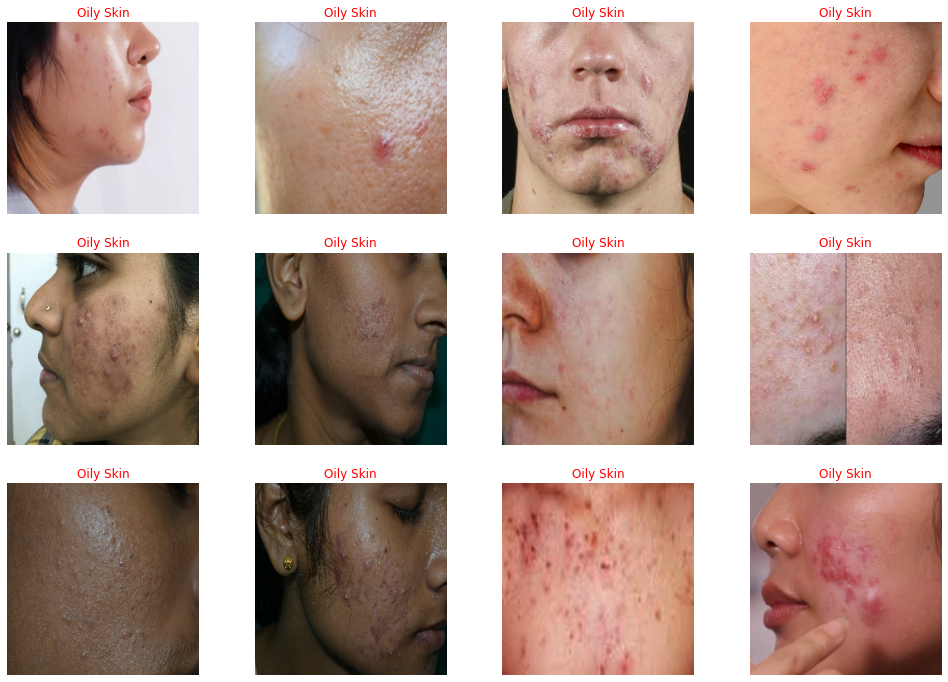

In [6]:
# Randomly plotting the Oily Skin images
random_oil_skin = np.random.choice(oil_list, size=12, replace=False)
plt.figure(figsize=(17, 12))
for i in range(12):
  img_path = random_oil_skin[i]
  img = load_and_prep(img_path)

  # plotting the images
  plt.subplot(3, 4, i+1)
  plt.axis(False)
  plt.imshow(img/255)
  plt.title("Oily Skin", color="red")

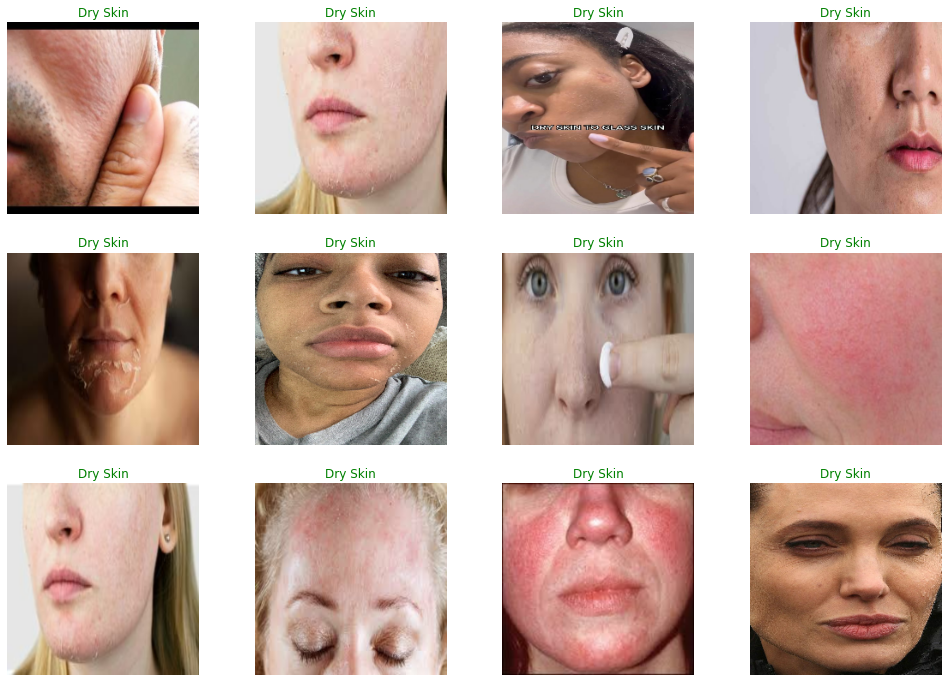

In [7]:
# Randomly plotting the Dry Skin images
random_dry_skin = np.random.choice(dry_list, size=12, replace=False)
plt.figure(figsize=(17, 12))
for i in range(12):
  img_path = random_dry_skin[i]
  img = load_and_prep(img_path)

  # plotting the images
  plt.subplot(3, 4, i+1)
  plt.axis(False)
  plt.imshow(img/255)
  plt.title("Dry Skin", color="green")
     

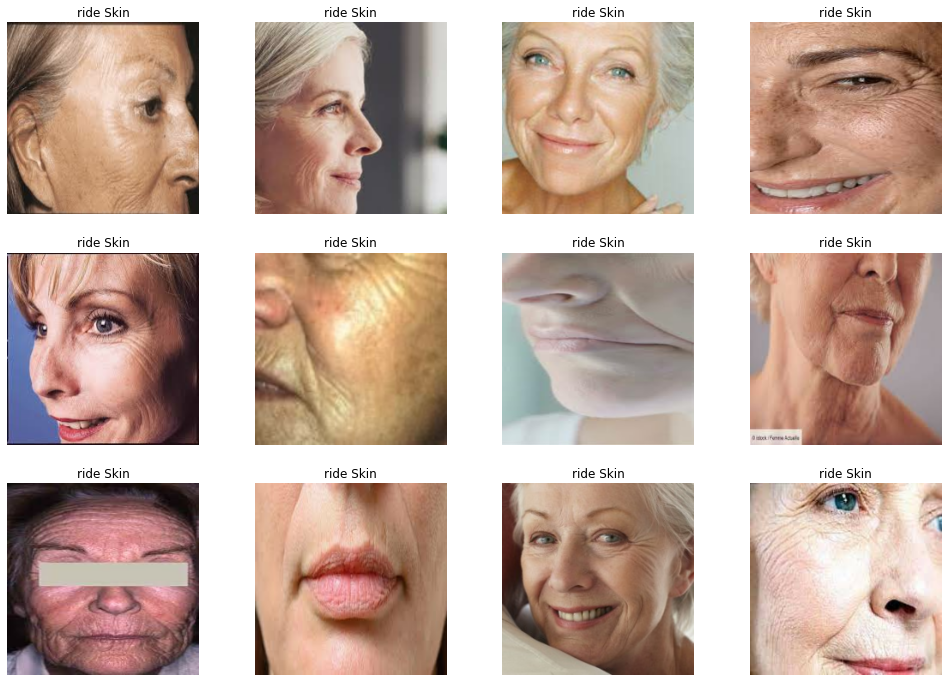

In [8]:
random_ride_skin = np.random.choice(ride_list, size=12, replace=False)
plt.figure(figsize=(17, 12))
for i in range(12):
  img_path = random_ride_skin[i]
  img = load_and_prep(img_path)

  # plotting the images
  plt.subplot(3, 4, i+1)
  plt.axis(False)
  plt.imshow(img/255)
  plt.title("ride Skin", color="black")
     

In [9]:
# Creating data augmentation layer
data_augmentation = tf.keras.Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomZoom(0.2),
   preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name="data_augmentation_layer")

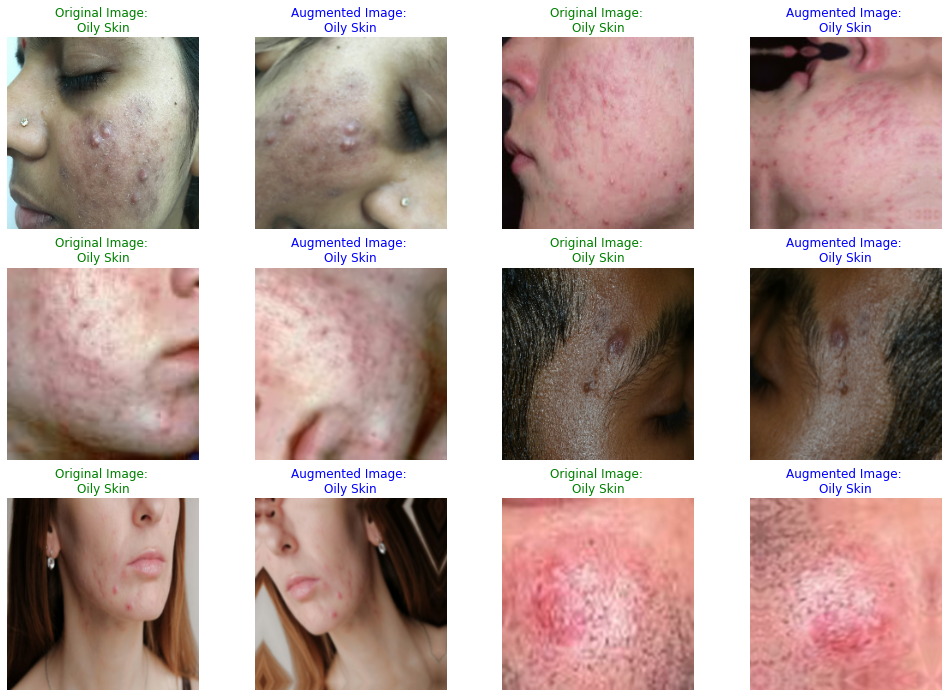

In [10]:
# Visualizing multiple randomly augmented oily skin images
plt.figure(figsize=(17, 12))
for i in range(1, 12, 2):
  random_class = "Oily Skin"
  random_img_path = random.choice(oil_list)

  img = load_and_prep(random_img_path)
  aug_img = data_augmentation(tf.expand_dims(img, axis=0))
  aug_img = tf.image.resize(aug_img[0], IMG_SIZE)

  # Plotting original image
  plt.subplot(3, 4, i)
  plt.axis(False)
  plt.imshow(img / 255)
  plt.title(f"Original Image: \n{random_class}", color="green")

  # Plotting augmented image
  plt.subplot(3, 4, i+1)
  plt.axis(False)
  plt.imshow(aug_img / 255)
  plt.title(f"Augmented Image: \n{random_class}", color="blue");

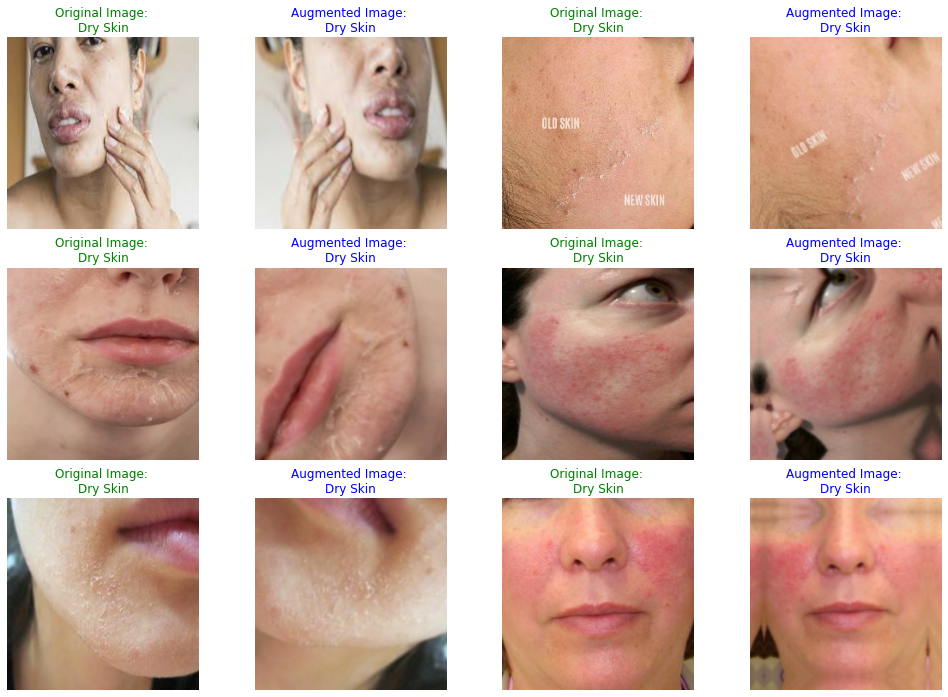

In [11]:
# Visualizing multiple randomly augmented dry skin images
plt.figure(figsize=(17, 12))
for i in range(1, 12, 2):
  random_class = "Dry Skin"
  random_img_path = random.choice(dry_list)

  img = load_and_prep(random_img_path)
  aug_img = data_augmentation(tf.expand_dims(img, axis=0))
  aug_img = tf.image.resize(aug_img[0], IMG_SIZE)

  # Plotting original image
  plt.subplot(3, 4, i)
  plt.axis(False)
  plt.imshow(img / 255)
  plt.title(f"Original Image: \n{random_class}", color="green")

  # Plotting augmented image
  plt.subplot(3, 4, i+1)
  plt.axis(False)
  plt.imshow(aug_img / 255)
  plt.title(f"Augmented Image: \n{random_class}", color="blue")

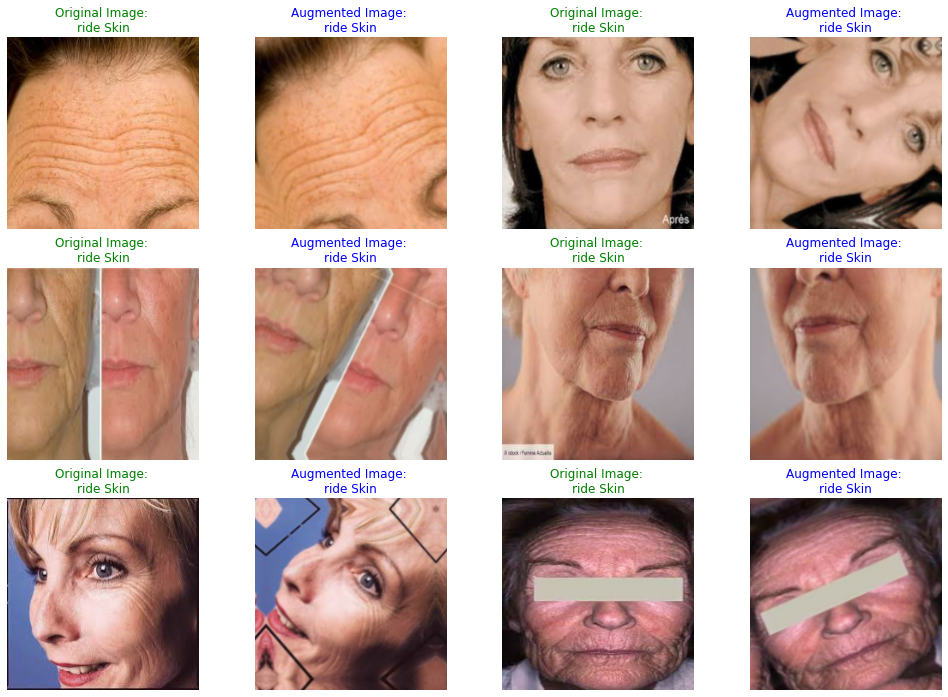

In [12]:
# Visualizing multiple randomly augmented ride skin images
plt.figure(figsize=(17, 12))
for i in range(1, 12, 2):
  random_class = "ride Skin"
  random_img_path = random.choice(ride_list)

  img = load_and_prep(random_img_path)
  aug_img = data_augmentation(tf.expand_dims(img, axis=0))
  aug_img = tf.image.resize(aug_img[0], IMG_SIZE)

  # Plotting original image
  plt.subplot(3, 4, i)
  plt.axis(False)
  plt.imshow(img / 255)
  plt.title(f"Original Image: \n{random_class}", color="green")

  # Plotting augmented image
  plt.subplot(3, 4, i+1)
  plt.axis(False)
  plt.imshow(aug_img / 255)
  plt.title(f"Augmented Image: \n{random_class}", color="blue")

In [13]:
# Train test splits
data_gen = ImageDataGenerator(validation_split=0.2)

train_data = data_gen.flow_from_directory(directory="C:\\Users\\HP\\Desktop\\skinproject\\Dataset\\train",
                                          subset='training',
                                          target_size=IMG_SIZE)

test_data = data_gen.flow_from_directory(directory="C:\\Users\\HP\\Desktop\\skinproject\\Dataset\\train",
                                         subset='validation',
                                         target_size=IMG_SIZE)
     

Found 123 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [14]:
train_data.class_indices

{'Dry': 0, 'Oily': 1, 'Ride': 2}

In [15]:
len(train_data), len(test_data)


(4, 1)

In [16]:
# Setting up base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setting up input layer
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x) 
model_1 = tf.keras.Model(inputs, outputs)
# compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)))

Epoch 1/50
4/4 [==============================] - 63s 9s/step - loss: 1.0581 - accuracy: 0.3902
Epoch 2/50
4/4 [==============================] - 13s 3s/step - loss: 0.7370 - accuracy: 0.6423
Epoch 3/50
4/4 [==============================] - 13s 3s/step - loss: 0.6247 - accuracy: 0.6911
Epoch 4/50
4/4 [==============================] - 11s 3s/step - loss: 0.5617 - accuracy: 0.7154
Epoch 5/50
4/4 [==============================] - 11s 3s/step - loss: 0.5028 - accuracy: 0.7724
Epoch 6/50
4/4 [==============================] - 11s 3s/step - loss: 0.4626 - accuracy: 0.7886
Epoch 7/50
4/4 [==============================] - 11s 3s/step - loss: 0.4563 - accuracy: 0.8049
Epoch 8/50
4/4 [==============================] - 12s 3s/step - loss: 0.4251 - accuracy: 0.8293
Epoch 9/50
4/4 [==============================] - 12s 3s/step - loss: 0.3995 - accuracy: 0.8455
Epoch 10/50
4/4 [==============================] - 13s 3s/step - loss: 0.3908 - accuracy: 0.8374
Epoch 11/50
4/4 [======================

In [17]:
# Model summary
model_1.summary()
     


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4,053,414
Trainable params: 3,843
Non-trainable

In [18]:

# Evaluating the model
model_1.evaluate(test_data)

1/1 [==============================] - 15s 15s/step - loss: 0.3244 - accuracy: 0.8333


[0.32440873980522156, 0.8333333134651184]

In [19]:
model_1.save("C:\\Users\\HP\\Desktop\\skinproject" ,save_format="tf")

INFO:tensorflow:Assets written to: C:\Users\HP\Desktop\skinproject\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Desktop\skinproject\assets


In [20]:
# Getting test image file paths
np.random.shuffle(test_data_img_paths)

# Getting labels
test_data_labels = []
for path in test_data_img_paths:
  test_data_labels.append(path.split("\\")[7])

# Creating a dataframe of test paths
df_test_data_img_paths = pd.DataFrame({"Img Paths": test_data_img_paths,
                                       "Labels": test_data_labels})

df_test_data_img_paths.head()

Img Paths Labels
0  C:\Users\HP\Desktop\skinproject\Dataset\train\...    Dry
1  C:\Users\HP\Desktop\skinproject\Dataset\train\...   Oily
2  C:\Users\HP\Desktop\skinproject\Dataset\train\...    Dry
3  C:\Users\HP\Desktop\skinproject\Dataset\train\...    Dry
4  C:\Users\HP\Desktop\skinproject\Dataset\train\...   Oily

In [21]:

# Generating a test dataset for 
test_data_shuff = data_gen.flow_from_dataframe(df_test_data_img_paths, 
                                               directory="C:\\Users\\HP\\Desktop\\skinproject\\Dataset\\train", 
                                               x_col='Img Paths', y_col='Labels',
                                               shuffle=False,
                                               target_size=(224, 224))

Found 30 validated image filenames belonging to 2 classes.


In [22]:
model = tf.keras.models.load_model("C:\\Users\\HP\\Desktop\\skinproject")

In [24]:
# Getting prediction probabilites
pred_prob = model.predict(test_data_shuff)
pred_prob[:20]

1/1 [==============================] - 4s 4s/step


array([[9.88984704e-01, 1.07448213e-02, 2.70474848e-04],
       [1.55142997e-03, 9.98302102e-01, 1.46492137e-04],
       [8.89470339e-01, 1.10147379e-01, 3.82300903e-04],
       [2.03351304e-01, 7.03918397e-01, 9.27303508e-02],
       [5.39277613e-01, 4.42087680e-01, 1.86347403e-02],
       [6.83020353e-01, 3.14904958e-01, 2.07472686e-03],
       [9.17769134e-01, 6.47436827e-02, 1.74872708e-02],
       [7.82646064e-04, 9.99173582e-01, 4.37287817e-05],
       [3.11403304e-01, 6.80607677e-01, 7.98901450e-03],
       [1.88346297e-01, 8.03987265e-01, 7.66633125e-03],
       [1.14316605e-02, 9.87985194e-01, 5.83140063e-04],
       [5.81027329e-01, 4.05005872e-01, 1.39668277e-02],
       [8.69242549e-01, 7.04533756e-02, 6.03040084e-02],
       [4.60720100e-02, 9.52639580e-01, 1.28839642e-03],
       [3.01989526e-01, 6.96688831e-01, 1.32161845e-03],
       [5.79228178e-02, 9.41296875e-01, 7.80312228e-04],
       [8.24134424e-02, 9.16962445e-01, 6.24146545e-04],
       [2.24106178e-01, 7.73091

In [26]:
y_pred = pred_prob.argmax(axis=1)
y_pred[:20]

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [27]:
test_data.class_indices


{'Dry': 0, 'Oily': 1, 'Ride': 2}

In [28]:
# Converting our text labels into numbers
y_true = []
for label in test_data_labels:
    if label == "Dry":
        label_=0
    elif label=="Oily":
        label_=1
    else :
        label_=2
y_true.append(label_)

y_true  = np.array(y_true)
y_true[:20]
     

array([1])

In [29]:
corrImgList = corrImgs(test_data_img_paths)


1/1 [==============================] - 0s 121ms/step


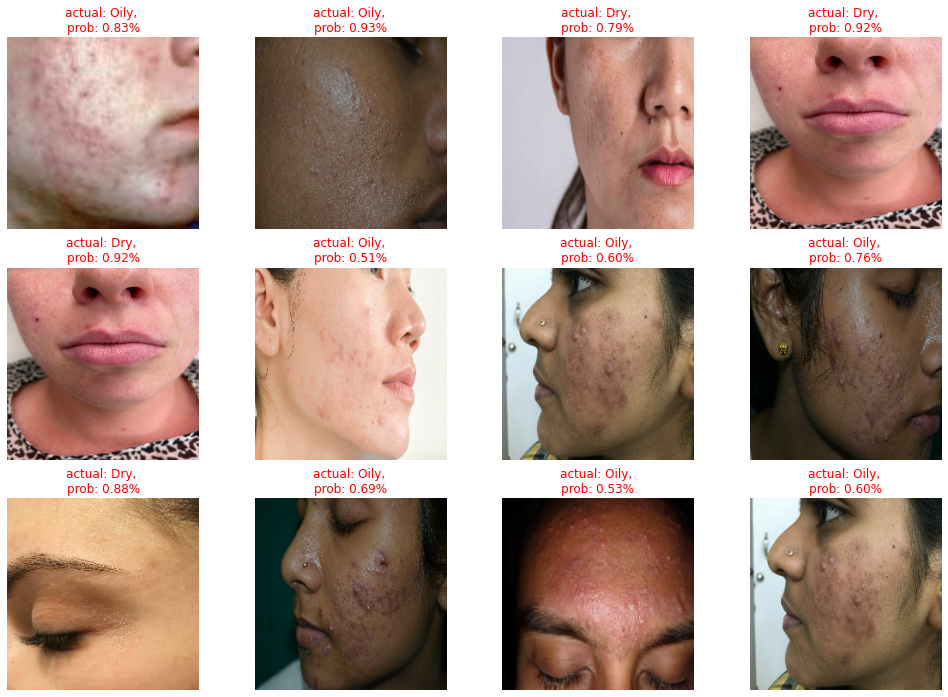

In [30]:
path_list = np.random.choice(corrImgList, size=12, replace=True)
plt.figure(figsize=(17, 12))
for i in range(12):
  img_path = path_list[i]
  class_name = img_path.split("\\")[7]
  img = load_and_prep(img_path)

  pred_prob  = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_name[pred_prob.argmax()]

  # Plot the image(s)
  plt.subplot(3, 4, i+1)
  plt.imshow(img/255.)
  title_color = "g" if class_name == pred_class else "r"
  plt.title(f"actual: {class_name}, \nprob: {pred_prob.max():.2f}%", c=title_color)
  plt.axis(False);